In [1]:
# Importing the required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import metrics
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
import xgboost as xgb
from xgboost import plot_importance
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing the dataset
df = pd.read_csv("../input/black-friday/train.csv")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
df.shape

(550068, 12)

In [4]:
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [5]:
# Null Values
df.isna().sum(axis = 0) 

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [6]:
# Mapping the Gender 
df['Gender'] = df['Gender'].replace({"F" : "Female", "M" : "Male"})
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,Female,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,Female,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,Female,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,Female,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,Male,55+,16,C,4+,0,8,NaN,NaN,7969


## Exploratory Data Analysis

#### Distribution of Age group according to Gender

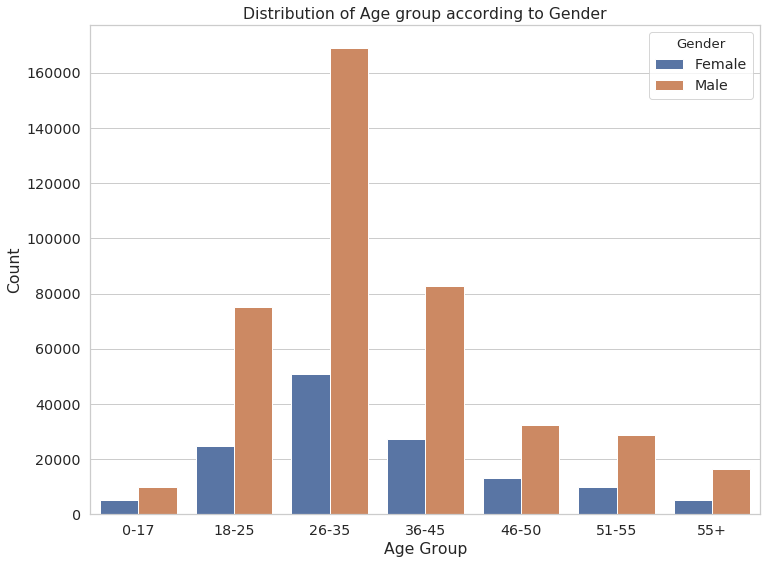

In [7]:
plt.rcParams['figure.figsize'] = [12, 9]
sns.set(style = 'whitegrid', font_scale = 1.3)
ax = sns.countplot('Age', hue = 'Gender',data = df, order = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']);
ax.set(title = "Distribution of Age group according to Gender", xlabel = "Age Group", ylabel = "Count");

#### Product_Category_1 Countplot with respect to Gender

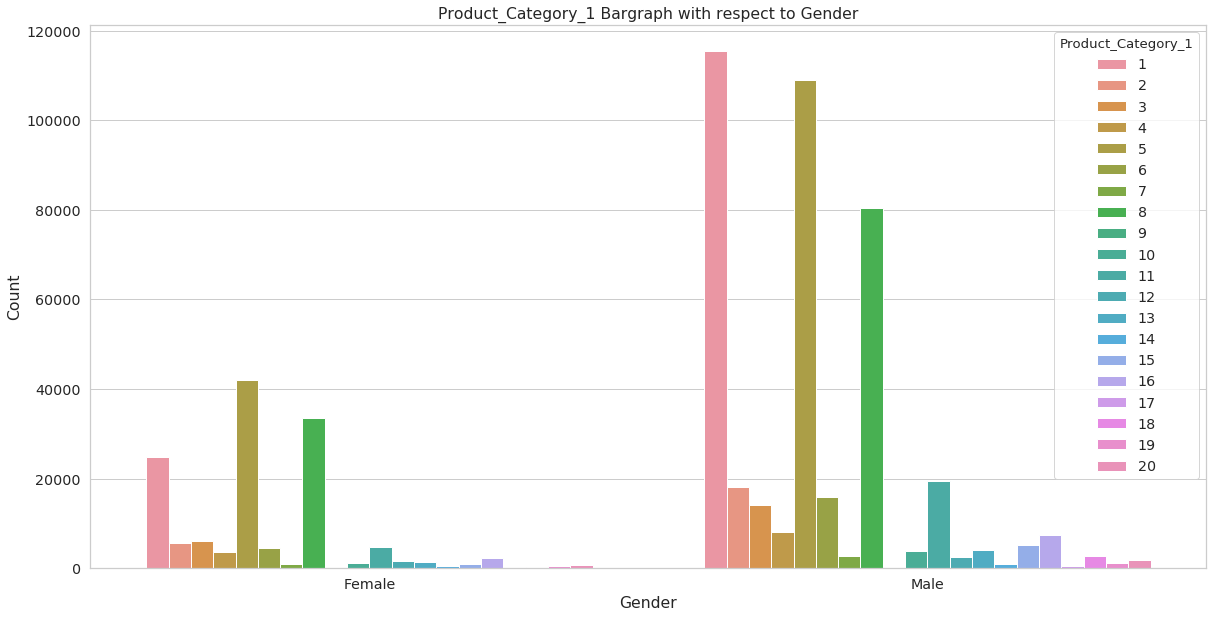

In [8]:
plt.rcParams['figure.figsize'] = [20, 10]
ax = sns.countplot('Gender', hue = 'Product_Category_1', data = df);
ax.set(title = "Product_Category_1 Bargraph with respect to Gender", xlabel = "Gender", ylabel = "Count");

#### Product_Category_2 Countplot with respect to Gender

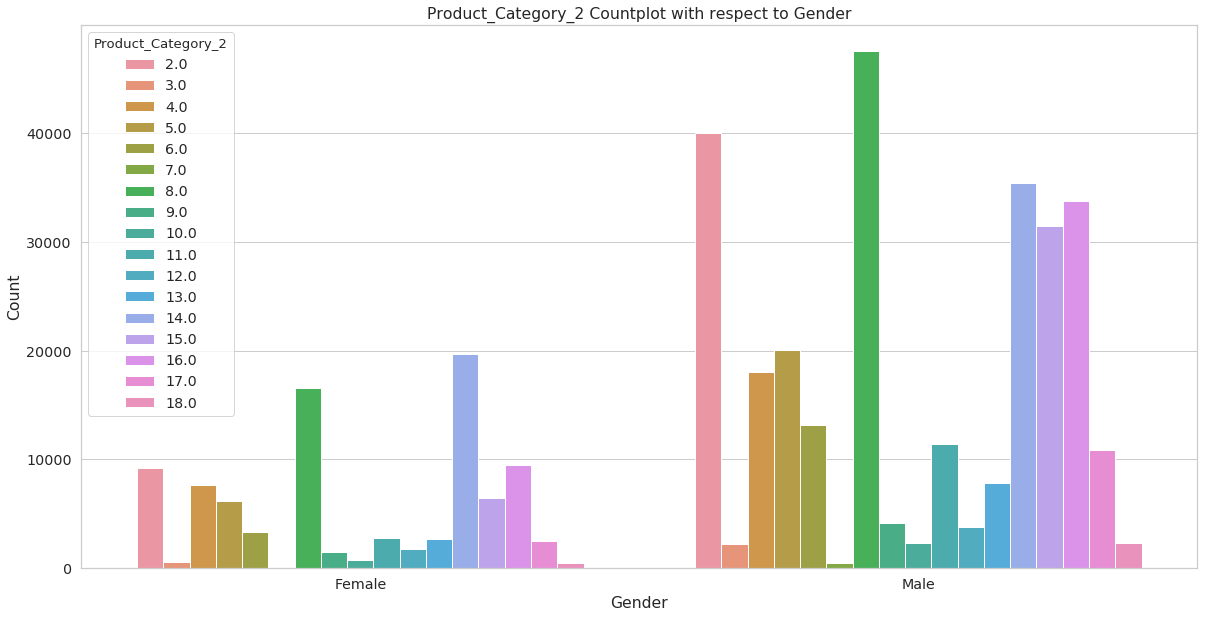

In [9]:
plt.rcParams['figure.figsize'] = [20, 10]
ax = sns.countplot('Gender', hue = 'Product_Category_2', data = df);
ax.set(title = "Product_Category_2 Countplot with respect to Gender", xlabel = "Gender", ylabel = "Count");

#### Product_Category_3 Countplot with respect to Gender

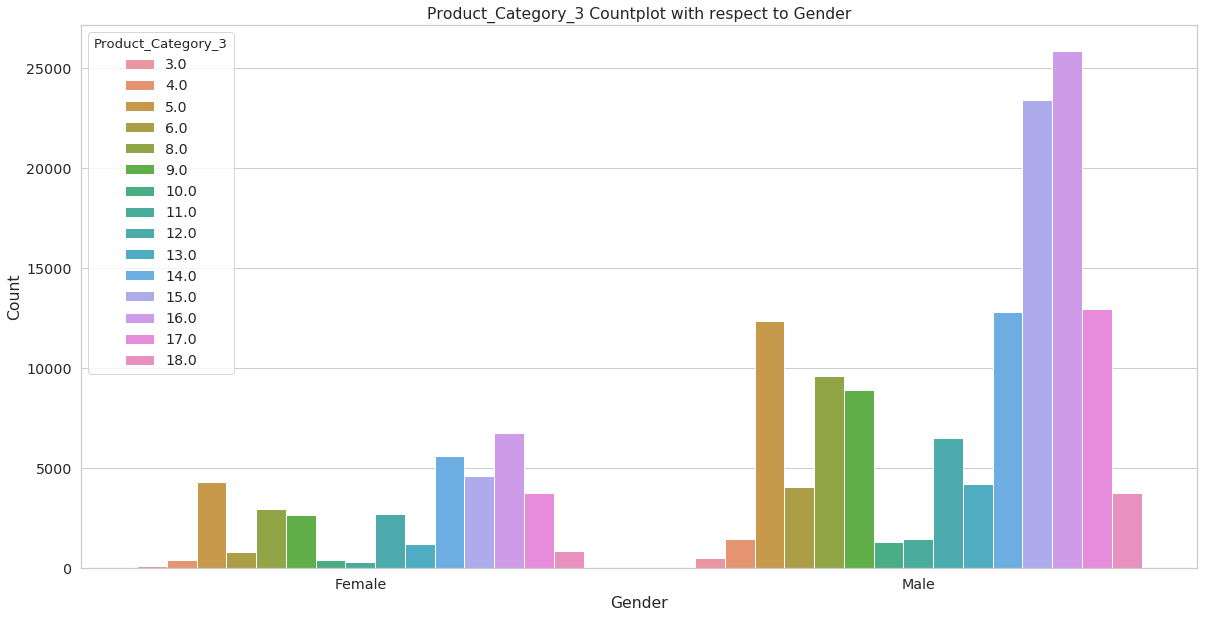

In [10]:
plt.rcParams['figure.figsize'] = [20, 10]
ax = sns.countplot('Gender', hue = 'Product_Category_3', data = df);
ax.set(title = "Product_Category_3 Countplot with respect to Gender", xlabel = "Gender", ylabel = "Count");

#### Distribution of the Purchase

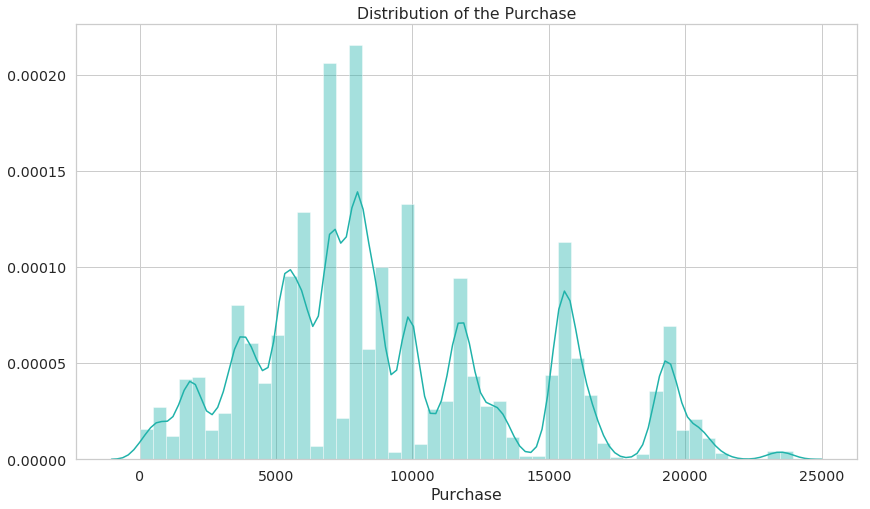

In [11]:
plt.rcParams['figure.figsize'] = [14, 8]
dist = sns.distplot(df['Purchase'], color = 'lightseagreen')
dist.set(title = "Distribution of the Purchase", xlabel = "Purchase");

#### Donut Graph showing Martial status of the customers according to the gender

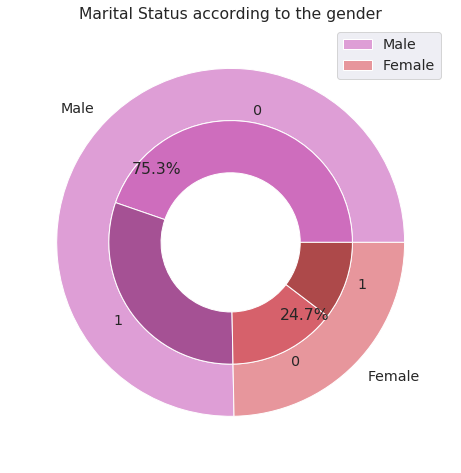

In [12]:
a = df['Marital_Status'].groupby(df['Gender']).value_counts()['Female'].values
b = df['Marital_Status'].groupby(df['Gender']).value_counts()['Male'].values

t = df.Gender.value_counts().values
t1 = np.array([b, a])

fig, ax = plt.subplots()
sns.set(font_scale = 1.3)
size = 0.3 

cmap = plt.get_cmap("tab20b_r")
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap(np.array([1, 2, 5, 6, 9, 10]))

ax.pie(t, radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'), autopct='%.01f%%', labels = ['Male', 'Female'])

ax.pie(t1.flatten(), radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'), labels = [0, 1, 0, 1])

ax.set(aspect="equal", title='Marital Status according to the gender')
ax.legend(['Male', 'Female'], loc = 'best');

## Preprocessing

The approach here to fill the null values will be taking the mode(most used product) of the product Category 2 and 3 according to the age group and fill the values in the particular age group.

In [13]:
# Most Used product according to the age group in the given data

prod_2 = df.groupby('Age')['Product_Category_2'].agg(lambda x:x.value_counts().index[0])
prod_2 = dict(prod_2)
print (prod_2)

prod_3 = df.groupby('Age')['Product_Category_3'].agg(lambda x:x.value_counts().index[0])
prod_3 = dict(prod_3)
print (prod_3)

{'0-17': 4.0, '18-25': 8.0, '26-35': 8.0, '36-45': 8.0, '46-50': 8.0, '51-55': 8.0, '55+': 8.0}
{'0-17': 16.0, '18-25': 16.0, '26-35': 16.0, '36-45': 16.0, '46-50': 16.0, '51-55': 16.0, '55+': 16.0}


In [14]:
# Since the most used product in product category 3 for all age group is 16.0 so, fillna can be used
df.Product_Category_3.fillna (value = 16.0, inplace = True)

# Filling the null values of the product category 2
for i in range(len(df)):
    if np.isnan(df.iloc[i, 9]) == True:
        key = df.iloc[i, 3]
        df.iloc[i, 9] = prod_2[key]
        
df['Product_Category_2'] = df['Product_Category_2'].astype(int)
df['Product_Category_3'] = df['Product_Category_3'].astype(int)

print ("Null values present : ")
df.isna().sum(axis = 0)

Null values present : 


User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [15]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,Female,0-17,10,A,2,0,3,4,16,8370
1,1000001,P00248942,Female,0-17,10,A,2,0,1,6,14,15200
2,1000001,P00087842,Female,0-17,10,A,2,0,12,4,16,1422
3,1000001,P00085442,Female,0-17,10,A,2,0,12,14,16,1057
4,1000002,P00285442,Male,55+,16,C,4+,0,8,8,16,7969


In [16]:
print ("Unique product ID : ", df.Product_ID.nunique())
print ("Size of the data set : ", df.shape[0])

Unique product ID :  3631
Size of the data set :  550068


In [17]:
# Changing the ProductID into numeric data
print ("The Product IDs containing the P00 : ", df.Product_ID.str.contains('P00').sum())

df.Product_ID = df.Product_ID.str.replace("P00", "")
df.Product_ID = df.Product_ID.astype(int)

# Normalizing the User_ID
df.User_ID = df.User_ID - 1000000
df.User_ID

df.head()

The Product IDs containing the P00 :  550068


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1,69042,Female,0-17,10,A,2,0,3,4,16,8370
1,1,248942,Female,0-17,10,A,2,0,1,6,14,15200
2,1,87842,Female,0-17,10,A,2,0,12,4,16,1422
3,1,85442,Female,0-17,10,A,2,0,12,14,16,1057
4,2,285442,Male,55+,16,C,4+,0,8,8,16,7969


In [18]:
# Changing age to numerical data
age = df['Age'].unique().tolist()
print (age)
dict_age = dict(zip(age, [17, 60, 35, 50, 55, 45, 25]))

print (dict_age)
df.Age = df.Age.map(dict_age)

['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']
{'0-17': 17, '55+': 60, '26-35': 35, '46-50': 50, '51-55': 55, '36-45': 45, '18-25': 25}


In [19]:
# Changing stay years to numerical data
stay = df.Stay_In_Current_City_Years.unique().tolist()
print (stay)
dict_stay = dict(zip(stay, [2, 4, 3, 1, 0]))

print (dict_stay)
df.Stay_In_Current_City_Years = df.Stay_In_Current_City_Years.map(dict_stay)

['2', '4+', '3', '1', '0']
{'2': 2, '4+': 4, '3': 3, '1': 1, '0': 0}


In [20]:
# Changing the rest of the categorical variables to numeric data

label_encoder_feat = {}
for feature in ['Gender', 'City_Category']:
    label_encoder_feat[feature] = preprocessing.LabelEncoder()
    df[feature] = label_encoder_feat[feature].fit_transform(df[feature])

print(df.dtypes)

User_ID                       int64
Product_ID                    int64
Gender                        int64
Age                           int64
Occupation                    int64
City_Category                 int64
Stay_In_Current_City_Years    int64
Marital_Status                int64
Product_Category_1            int64
Product_Category_2            int64
Product_Category_3            int64
Purchase                      int64
dtype: object


In [21]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1,69042,0,17,10,0,2,0,3,4,16,8370
1,1,248942,0,17,10,0,2,0,1,6,14,15200
2,1,87842,0,17,10,0,2,0,12,4,16,1422
3,1,85442,0,17,10,0,2,0,12,14,16,1057
4,2,285442,1,60,16,2,4,0,8,8,16,7969


In [22]:
# Splitting the dataset in 80:20 ratio for training:testing

Ytr = df['Purchase']
Xtr = df.drop(columns = ['Purchase'])

X_train, X_test, y_train, y_test = train_test_split(Xtr, Ytr, test_size = 0.20, random_state=0)

print ("The shape of the training data : ", X_train.shape)
print ("The shape of the testing data  : ", X_test.shape)

The shape of the training data :  (440054, 11)
The shape of the testing data  :  (110014, 11)


## Modelling

### Linear Regression

In [23]:
# Training
lin_reg = LinearRegression(normalize = True).fit(X_train,y_train)

# Predictions
predictions = lin_reg.predict(X_test)

# Scores
print ("RMSE : ", math.sqrt(metrics.mean_squared_error(y_test, predictions)))
print ("MAE  : ", metrics.mean_absolute_error(y_test, predictions))

RMSE :  4671.809298581026
MAE  :  3575.000999588837


### Polynomial Regression

In [24]:
# Transforming data
poly = preprocessing.PolynomialFeatures(degree = 2)

X_poly = poly.fit_transform(Xtr)
X_poly, X_test_poly, y_poly, y_test_poly = train_test_split(X_poly, Ytr, test_size = 0.20, random_state=0)

pol_reg = LinearRegression().fit(X_poly,y_poly)

# Predictions
predictions = pol_reg.predict(X_test_poly)

# Scores
print ("RMSE : ", math.sqrt(metrics.mean_squared_error(y_test_poly, predictions)))
print ("MAE  : ", metrics.mean_absolute_error(y_test_poly, predictions))

RMSE :  4374.074067880362
MAE  :  3284.9137120207497


### Lasso Regression

In [25]:
# Training
linlasso = Lasso(alpha = 1,max_iter = 1000).fit(X_train, y_train)

# Predictions
predictions = linlasso.predict(X_test)

# Scores
print ("RMSE : ", math.sqrt(metrics.mean_squared_error(y_test, predictions)))
print ("MAE  : ", metrics.mean_absolute_error(y_test, predictions))

RMSE :  4671.792866723971
MAE  :  3574.9548804288056


### XGBoost

In [26]:
# Training
xgb_reg = xgb.XGBRegressor(objective ='reg:linear',
                           colsample_bytree = 0.3,
                           learning_rate = 0.05,
                           max_depth = 10,
                           alpha = 10,
                           n_estimators = 1000)

xgb_reg.fit(X_train, y_train)

# Predictions
predictions = xgb_reg.predict(X_test)

# Scores
print ("RMSE : ", math.sqrt(metrics.mean_squared_error(y_test, predictions)))
print ("MAE  : ", metrics.mean_absolute_error(y_test, predictions))

RMSE :  2520.3550997531447
MAE  :  1872.6766644789525


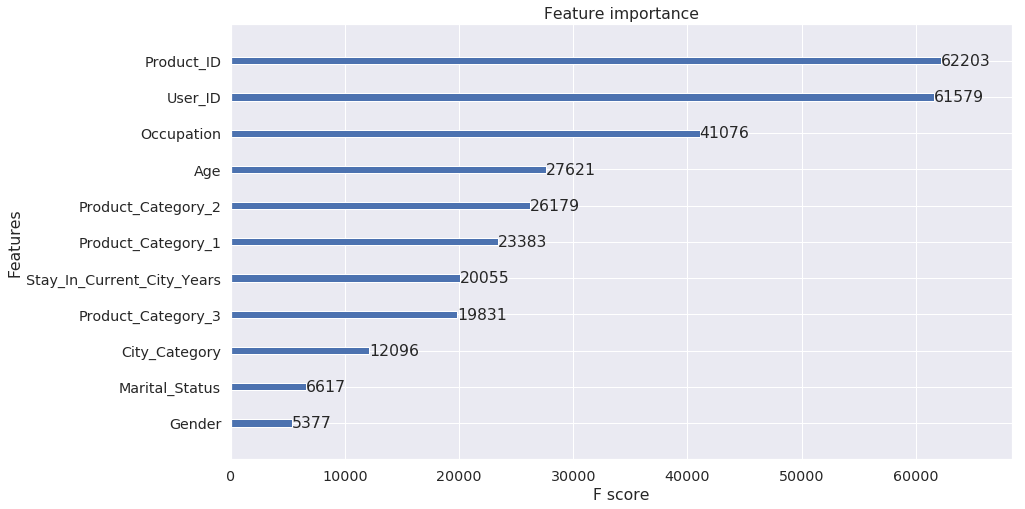

In [27]:
# Feature importance plot
plot_importance(xgb_reg);

### ElasticNet

In [28]:
# Training
elastic_reg = ElasticNet(random_state=0)
elastic_reg.fit(X_train, y_train)

# Predictions
predictions = elastic_reg.predict(X_test)

# Scores
print ("RMSE : ", math.sqrt(metrics.mean_squared_error(y_test, predictions)))
print ("MAE  : ", metrics.mean_absolute_error(y_test, predictions))

RMSE :  4676.256583554555
MAE  :  3582.787164927642
